In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df_trainset_midi = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Yujung/dataset/dataset for SHAP/df_trainset_midi.csv",
    delimiter=",",
    decimal="."
)
df_trainset_midi.head()

,Unnamed: 0,Image_Name,Area_avg,Area_max,Area_std,Aspect_ratio_avg,Roundness_avg,Roundness_std,Max angle,Uniqueness_avg,...,Normalized_Enthalpy,mu,sigma,skewness,kurtosis,Simulation temperature skeweness,Simulation length,Simulation width,Simulation depth,Simulation ratio
0,10,4_4_1,82.961,310.859,72.815,1.194,0.869,0.061,96.0,0.734,...,8.379002,816.483607,23.72693,-0.371304,0.889142,1.54305,0.000269,0.00011,0.00007,2.446418
1,1,4_1_1,66.993,449.018,79.834,1.192,0.856,0.053,101.0,0.680,...,8.379002,816.483607,23.72693,-0.371304,0.889142,1.54305,0.000269,0.00011,0.00007,2.446418
2,2,4_1_2,44.134,85.198,30.415,1.131,0.850,0.063,90.0,0.687,...,8.379002,816.483607,23.72693,-0.371304,0.889142,1.54305,0.000269,0.00011,0.00007,2.446418
3,3,4_2_1,55.264,283.227,70.037,1.264,0.826,0.076,104.0,0.619,...,8.379002,816.483607,23.72693,-0.371304,0.889142,1.54305,0.000269,0.00011,0.00007,2.446418
4,4,4_2_2,104.175,693.100,154.974,1.336,0.823,0.113,104.0,0.746,...,8.379002,816.483607,23.72693,-0.371304,0.889142,1.54305,0.000269,0.00011,0.00007,2.446418


In [3]:
df_umap = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Yujung/dataset/dataset for SHAP/df_FeatureEng.csv",
    delimiter=",",
    decimal="."
)
df_umap.head()

,Unnamed: 0,PC1,PC2,PC3,PC4,PC5,PC6,Max angle,Sample
0,0,13.763600,9.057179,0.546504,2.422940,5.347631,7.179610,96.0,81
1,1,14.002046,9.835247,1.479506,2.870611,5.040916,6.755266,101.0,4
2,2,2.391491,4.940581,8.472274,4.163855,3.585628,0.429802,90.0,4
3,3,13.912158,8.500292,1.608695,3.120563,5.456316,7.088325,104.0,4
4,4,14.147624,5.893158,1.456399,2.840295,6.301803,8.003495,104.0,4


In [4]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 58.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 70.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.8 MB/s eta 0:0

In [5]:
from pycaret.regression import *

In [6]:
df_trainset_midi.iloc[:,2:16]

,Area_avg,Area_max,Area_std,Aspect_ratio_avg,Roundness_avg,Roundness_std,Max angle,Uniqueness_avg,Uniqueness_std,Pore counts,RDF025,pc1,pc2,pc3
0,82.961,310.859,72.815,1.194,0.869,0.061,96.0,0.734,0.239,35.0,45.650,-0.292027,-0.002292,0.000535
1,66.993,449.018,79.834,1.192,0.856,0.053,101.0,0.680,0.251,32.0,53.900,-0.378853,-0.001451,0.001006
2,44.134,85.198,30.415,1.131,0.850,0.063,90.0,0.687,0.284,6.0,600.000,-0.561966,-0.000269,0.001196
3,55.264,283.227,70.037,1.264,0.826,0.076,104.0,0.619,0.281,32.0,36.500,-0.397704,-0.000806,0.001375
4,104.175,693.100,154.974,1.336,0.823,0.113,104.0,0.746,0.274,29.0,36.375,-0.316365,0.000805,0.002000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,122.583,483.558,105.979,1.452,0.825,0.081,118.0,0.843,0.224,51.0,67.550,-0.024554,0.000649,-0.000936
1131,96.204,856.589,123.571,1.393,0.836,0.078,104.0,0.785,0.213,59.0,64.000,-0.055870,0.000170,-0.000188
1132,100.642,361.517,76.980,1.365,0.830,0.082,112.0,0.811,0.230,99.0,62.950,0.384935,-0.004688,-0.001028
1133,98.425,522.703,83.453,1.368,0.844,0.063,97.0,0.822,0.206,82.0,67.900,0.180830,-0.002845,-0.001077


In [7]:
df_trainset_clean = df_trainset_midi.drop(['Pore counts', 'Area_std','pc1','Area_max'], axis=1)

In [8]:
df_trainset_clean.iloc[:,1:]

,Image_Name,Area_avg,Aspect_ratio_avg,Roundness_avg,Roundness_std,Max angle,Uniqueness_avg,Uniqueness_std,RDF025,pc2,...,Normalized_Enthalpy,mu,sigma,skewness,kurtosis,Simulation temperature skeweness,Simulation length,Simulation width,Simulation depth,Simulation ratio
0,4_4_1,82.961,1.194,0.869,0.061,96.0,0.734,0.239,45.650,-0.002292,...,8.379002,816.483607,23.726930,-0.371304,0.889142,1.543050,0.000269,0.000110,0.000070,2.446418
1,4_1_1,66.993,1.192,0.856,0.053,101.0,0.680,0.251,53.900,-0.001451,...,8.379002,816.483607,23.726930,-0.371304,0.889142,1.543050,0.000269,0.000110,0.000070,2.446418
2,4_1_2,44.134,1.131,0.850,0.063,90.0,0.687,0.284,600.000,-0.000269,...,8.379002,816.483607,23.726930,-0.371304,0.889142,1.543050,0.000269,0.000110,0.000070,2.446418
3,4_2_1,55.264,1.264,0.826,0.076,104.0,0.619,0.281,36.500,-0.000806,...,8.379002,816.483607,23.726930,-0.371304,0.889142,1.543050,0.000269,0.000110,0.000070,2.446418
4,4_2_2,104.175,1.336,0.823,0.113,104.0,0.746,0.274,36.375,0.000805,...,8.379002,816.483607,23.726930,-0.371304,0.889142,1.543050,0.000269,0.000110,0.000070,2.446418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,81_1_2,122.583,1.452,0.825,0.081,118.0,0.843,0.224,67.550,0.000649,...,6.672477,816.756840,23.733471,-0.375614,0.886696,1.537823,0.000276,0.000098,0.000057,2.818904
1131,81_1_1,96.204,1.393,0.836,0.078,104.0,0.785,0.213,64.000,0.000170,...,6.672477,816.756840,23.733471,-0.375614,0.886696,1.537823,0.000276,0.000098,0.000057,2.818904
1132,81_4_2,100.642,1.365,0.830,0.082,112.0,0.811,0.230,62.950,-0.004688,...,6.672477,816.756840,23.733471,-0.375614,0.886696,1.537823,0.000276,0.000098,0.000057,2.818904
1133,81_2_2,98.425,1.368,0.844,0.063,97.0,0.822,0.206,67.900,-0.002845,...,6.672477,816.756840,23.733471,-0.375614,0.886696,1.537823,0.000276,0.000098,0.000057,2.818904


In [9]:
#build df, check if X and y have same length, otherwise re-run TSNE with X_train

df = df_trainset_clean.iloc[:,2:13]
df['enthalpy'] = df_trainset_clean['Normalized_Enthalpy']
df

,Area_avg,Aspect_ratio_avg,Roundness_avg,Roundness_std,Max angle,Uniqueness_avg,Uniqueness_std,RDF025,pc2,pc3,pore%,enthalpy
0,82.961,1.194,0.869,0.061,96.0,0.734,0.239,45.650,-0.002292,0.000535,0.118889,8.379002
1,66.993,1.192,0.856,0.053,101.0,0.680,0.251,53.900,-0.001451,0.001006,0.084722,8.379002
2,44.134,1.131,0.850,0.063,90.0,0.687,0.284,600.000,-0.000269,0.001196,0.012778,8.379002
3,55.264,1.264,0.826,0.076,104.0,0.619,0.281,36.500,-0.000806,0.001375,0.077500,8.379002
4,104.175,1.336,0.823,0.113,104.0,0.746,0.274,36.375,0.000805,0.002000,0.110278,8.379002
...,...,...,...,...,...,...,...,...,...,...,...,...
1130,122.583,1.452,0.825,0.081,118.0,0.843,0.224,67.550,0.000649,-0.000936,0.224167,6.672477
1131,96.204,1.393,0.836,0.078,104.0,0.785,0.213,64.000,0.000170,-0.000188,0.211667,6.672477
1132,100.642,1.365,0.830,0.082,112.0,0.811,0.230,62.950,-0.004688,-0.001028,0.385556,6.672477
1133,98.425,1.368,0.844,0.063,97.0,0.822,0.206,67.900,-0.002845,-0.001077,0.305000,6.672477


In [10]:
df_trainset_clean.iloc[:,-5:]

,Simulation temperature skeweness,Simulation length,Simulation width,Simulation depth,Simulation ratio
0,1.543050,0.000269,0.000110,0.000070,2.446418
1,1.543050,0.000269,0.000110,0.000070,2.446418
2,1.543050,0.000269,0.000110,0.000070,2.446418
3,1.543050,0.000269,0.000110,0.000070,2.446418
4,1.543050,0.000269,0.000110,0.000070,2.446418
...,...,...,...,...,...
1130,1.537823,0.000276,0.000098,0.000057,2.818904
1131,1.537823,0.000276,0.000098,0.000057,2.818904
1132,1.537823,0.000276,0.000098,0.000057,2.818904
1133,1.537823,0.000276,0.000098,0.000057,2.818904


In [11]:
df_sim = df_trainset_clean.drop(['Unnamed: 0','mu', 'sigma','kurtosis','skewness','Image_Name','Power','Speed','Energy_Density'], axis=1)
df_sim

,Area_avg,Aspect_ratio_avg,Roundness_avg,Roundness_std,Max angle,Uniqueness_avg,Uniqueness_std,RDF025,pc2,pc3,pore%,Sample,Normalized_Enthalpy,Simulation temperature skeweness,Simulation length,Simulation width,Simulation depth,Simulation ratio
0,82.961,1.194,0.869,0.061,96.0,0.734,0.239,45.650,-0.002292,0.000535,0.118889,4,8.379002,1.543050,0.000269,0.000110,0.000070,2.446418
1,66.993,1.192,0.856,0.053,101.0,0.680,0.251,53.900,-0.001451,0.001006,0.084722,4,8.379002,1.543050,0.000269,0.000110,0.000070,2.446418
2,44.134,1.131,0.850,0.063,90.0,0.687,0.284,600.000,-0.000269,0.001196,0.012778,4,8.379002,1.543050,0.000269,0.000110,0.000070,2.446418
3,55.264,1.264,0.826,0.076,104.0,0.619,0.281,36.500,-0.000806,0.001375,0.077500,4,8.379002,1.543050,0.000269,0.000110,0.000070,2.446418
4,104.175,1.336,0.823,0.113,104.0,0.746,0.274,36.375,0.000805,0.002000,0.110278,4,8.379002,1.543050,0.000269,0.000110,0.000070,2.446418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,122.583,1.452,0.825,0.081,118.0,0.843,0.224,67.550,0.000649,-0.000936,0.224167,81,6.672477,1.537823,0.000276,0.000098,0.000057,2.818904
1131,96.204,1.393,0.836,0.078,104.0,0.785,0.213,64.000,0.000170,-0.000188,0.211667,81,6.672477,1.537823,0.000276,0.000098,0.000057,2.818904
1132,100.642,1.365,0.830,0.082,112.0,0.811,0.230,62.950,-0.004688,-0.001028,0.385556,81,6.672477,1.537823,0.000276,0.000098,0.000057,2.818904
1133,98.425,1.368,0.844,0.063,97.0,0.822,0.206,67.900,-0.002845,-0.001077,0.305000,81,6.672477,1.537823,0.000276,0.000098,0.000057,2.818904


In [12]:
df_sim.columns

Index(['Area_avg', 'Aspect_ratio_avg', 'Roundness_avg', 'Roundness_std',
       'Max angle', 'Uniqueness_avg', 'Uniqueness_std', 'RDF025', 'pc2', 'pc3',
       'pore%', 'Sample', 'Normalized_Enthalpy',
       'Simulation temperature skeweness', 'Simulation length',
       'Simulation width', 'Simulation depth', 'Simulation ratio'],
      dtype='object')

In [13]:
df_pyro = df_trainset_clean.drop(['Unnamed: 0','Simulation temperature skeweness', 'Simulation length','Simulation width','Simulation depth','Simulation ratio','Image_Name','Power','Speed','Energy_Density'], axis=1)
df_pyro

,Area_avg,Aspect_ratio_avg,Roundness_avg,Roundness_std,Max angle,Uniqueness_avg,Uniqueness_std,RDF025,pc2,pc3,pore%,Sample,Normalized_Enthalpy,mu,sigma,skewness,kurtosis
0,82.961,1.194,0.869,0.061,96.0,0.734,0.239,45.650,-0.002292,0.000535,0.118889,4,8.379002,816.483607,23.726930,-0.371304,0.889142
1,66.993,1.192,0.856,0.053,101.0,0.680,0.251,53.900,-0.001451,0.001006,0.084722,4,8.379002,816.483607,23.726930,-0.371304,0.889142
2,44.134,1.131,0.850,0.063,90.0,0.687,0.284,600.000,-0.000269,0.001196,0.012778,4,8.379002,816.483607,23.726930,-0.371304,0.889142
3,55.264,1.264,0.826,0.076,104.0,0.619,0.281,36.500,-0.000806,0.001375,0.077500,4,8.379002,816.483607,23.726930,-0.371304,0.889142
4,104.175,1.336,0.823,0.113,104.0,0.746,0.274,36.375,0.000805,0.002000,0.110278,4,8.379002,816.483607,23.726930,-0.371304,0.889142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,122.583,1.452,0.825,0.081,118.0,0.843,0.224,67.550,0.000649,-0.000936,0.224167,81,6.672477,816.756840,23.733471,-0.375614,0.886696
1131,96.204,1.393,0.836,0.078,104.0,0.785,0.213,64.000,0.000170,-0.000188,0.211667,81,6.672477,816.756840,23.733471,-0.375614,0.886696
1132,100.642,1.365,0.830,0.082,112.0,0.811,0.230,62.950,-0.004688,-0.001028,0.385556,81,6.672477,816.756840,23.733471,-0.375614,0.886696
1133,98.425,1.368,0.844,0.063,97.0,0.822,0.206,67.900,-0.002845,-0.001077,0.305000,81,6.672477,816.756840,23.733471,-0.375614,0.886696


In [14]:
# reg1 = setup(df, target = "enthalpy",ignore_features="Sample", session_id=123, preprocess="True")
# reg1 = setup(df_sim, target = "Normalized_Enthalpy",ignore_features="Sample", session_id=123, preprocess="True")
reg1 = setup(df_pyro, target = "Normalized_Enthalpy",ignore_features="Sample", session_id=123, preprocess="True")

,Description,Value
0,Session id,123
1,Target,Normalized_Enthalpy
2,Target type,Regression
3,Original data shape,"(1135, 17)"
4,Transformed data shape,"(1135, 16)"
5,Transformed train set shape,"(794, 16)"
6,Transformed test set shape,"(341, 16)"
7,Ignore features,6
8,Numeric features,15
9,Preprocess,True


In [15]:
# df reference
best_model = compare_models(fold=20)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,0.1127,0.0391,0.1892,0.9480,0.0235,0.0161,0.2715
lightgbm,Light Gradient Boosting Machine,0.1277,0.0444,0.1993,0.9387,0.0247,0.0181,0.6050
rf,Random Forest Regressor,0.1184,0.0506,0.2136,0.9317,0.0264,0.0167,0.8490
et,Extra Trees Regressor,0.1345,0.0530,0.2238,0.9287,0.0274,0.0190,0.2655
gbr,Gradient Boosting Regressor,0.1677,0.0592,0.2376,0.9183,0.0293,0.0238,0.3225
dt,Decision Tree Regressor,0.1042,0.1101,0.3094,0.8518,0.0382,0.0148,0.0520
ada,AdaBoost Regressor,0.2696,0.1130,0.3327,0.8469,0.0420,0.0391,0.2830
lr,Linear Regression,0.3816,0.2784,0.5178,0.6285,0.0644,0.0543,0.6110
lar,Least Angle Regression,0.3825,0.2788,0.5183,0.6274,0.0647,0.0546,0.0470
br,Bayesian Ridge,0.4160,0.3141,0.5519,0.5838,0.0691,0.0593,0.0260


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
# df with pyrometer data

best_model_pyro = compare_models(fold=20)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,0.1127,0.0391,0.1892,0.9480,0.0235,0.0161,0.2420
lightgbm,Light Gradient Boosting Machine,0.1277,0.0444,0.1993,0.9387,0.0247,0.0181,0.5250
rf,Random Forest Regressor,0.1184,0.0506,0.2136,0.9317,0.0264,0.0167,0.7415
et,Extra Trees Regressor,0.1345,0.0530,0.2238,0.9287,0.0274,0.0190,0.2355
gbr,Gradient Boosting Regressor,0.1677,0.0592,0.2376,0.9183,0.0293,0.0238,0.3185
dt,Decision Tree Regressor,0.1042,0.1101,0.3094,0.8518,0.0382,0.0148,0.0240
ada,AdaBoost Regressor,0.2696,0.1130,0.3327,0.8469,0.0420,0.0391,0.2495
lr,Linear Regression,0.3816,0.2784,0.5178,0.6285,0.0644,0.0543,0.4890
lar,Least Angle Regression,0.3825,0.2788,0.5183,0.6274,0.0647,0.0546,0.0395
br,Bayesian Ridge,0.4160,0.3141,0.5519,0.5838,0.0691,0.0593,0.0200


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
# df with simulation data

best_model_sim = compare_models(fold=20)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.0298,0.0032,0.0534,0.9955,0.0065,0.0041,0.2890
et,Extra Trees Regressor,0.0241,0.0041,0.0532,0.9947,0.0065,0.0034,0.3535
xgboost,Extreme Gradient Boosting,0.0241,0.0044,0.0537,0.9941,0.0065,0.0033,0.3435
rf,Random Forest Regressor,0.0269,0.0043,0.0574,0.9940,0.0070,0.0038,0.4990
dt,Decision Tree Regressor,0.0140,0.0081,0.0676,0.9892,0.0082,0.0020,0.0250
gbr,Gradient Boosting Regressor,0.0676,0.0087,0.0918,0.9879,0.0114,0.0096,0.2520
ada,AdaBoost Regressor,0.1590,0.0342,0.1845,0.9534,0.0232,0.0229,0.1585
lar,Least Angle Regression,0.2499,0.1429,0.3214,0.8149,0.0407,0.0358,0.0325
lr,Linear Regression,0.3796,0.2577,0.4997,0.6588,0.0619,0.0540,0.0215
br,Bayesian Ridge,0.3967,0.2712,0.5140,0.6410,0.0639,0.0565,0.0355


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3374,0.2115,0.4599,0.6259,0.0559,0.0476
1,0.3157,0.1786,0.4226,0.7696,0.0516,0.0451
2,0.3814,0.3708,0.6090,0.5567,0.0725,0.0508
3,0.2975,0.1444,0.3800,0.7525,0.0462,0.0427
4,0.3608,0.3000,0.5478,0.6574,0.0659,0.0484
5,0.2840,0.1586,0.3983,0.8043,0.0481,0.0400
6,0.3091,0.2364,0.4862,0.7090,0.0584,0.0421
7,0.2706,0.1619,0.4024,0.7758,0.0476,0.0374
8,0.2428,0.1215,0.3486,0.8545,0.0420,0.0345


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# tuned_et = tune_model(et, n_iter = 100)

In [ ]:
xgb = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1491,0.0545,0.2335,0.9036,0.0289,0.0209
1,0.0818,0.0160,0.1265,0.9794,0.0168,0.0121
2,0.1597,0.1043,0.3229,0.8753,0.0384,0.0215
3,0.1335,0.0548,0.2341,0.9061,0.0291,0.0197
4,0.1555,0.0732,0.2706,0.9164,0.0333,0.0219
5,0.0774,0.0186,0.1366,0.9770,0.0163,0.0109
6,0.1032,0.0342,0.1849,0.9579,0.0229,0.0146
7,0.1047,0.0331,0.1821,0.9541,0.0221,0.0149
8,0.1128,0.0402,0.2005,0.9519,0.0251,0.0167


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0358,0.0036,0.0601,0.9936,0.0076,0.0051
1,0.0356,0.0041,0.0642,0.9947,0.0076,0.0048
2,0.0329,0.0031,0.0560,0.9962,0.0069,0.0046
3,0.0394,0.0053,0.0729,0.9909,0.0091,0.0057
4,0.0336,0.0033,0.0578,0.9962,0.0068,0.0046
5,0.0226,0.0020,0.0448,0.9975,0.0050,0.0030
6,0.0275,0.0019,0.0440,0.9976,0.0054,0.0039
7,0.0307,0.0043,0.0658,0.9940,0.0077,0.0042
8,0.0406,0.0072,0.0847,0.9914,0.0103,0.0057


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

#SHAP analysis

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 7.4 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
X

,Unnamed: 0,Area_avg,Aspect_ratio_avg,Roundness_avg,Roundness_std,Max angle,Uniqueness_avg,Uniqueness_std,RDF025,pc2,pc3,pore%,Simulation temperature skeweness,Simulation length,Simulation width,Simulation depth,Simulation ratio
66,75,90.955002,1.117,0.883,0.038,90.0,0.751,0.239,55.900002,-0.001971,-0.000160,0.141111,1.609485,0.000297,0.000101,0.000055,2.940012
175,179,129.897003,1.296,0.869,0.070,95.0,0.828,0.210,68.800003,-0.000082,-0.001031,0.161111,1.579563,0.000238,0.000101,0.000059,2.356457
55,48,90.570999,1.133,0.887,0.038,90.0,0.764,0.160,54.250000,-0.000283,0.000723,0.061667,1.589690,0.000272,0.000106,0.000063,2.558246
28,39,64.264999,1.116,0.872,0.056,90.0,0.606,0.211,79.224998,-0.001276,0.000936,0.057500,1.582612,0.000279,0.000111,0.000063,2.527153
633,625,151.459000,1.326,0.852,0.075,104.0,0.876,0.230,58.549999,0.001715,-0.002597,0.275000,1.554129,0.000263,0.000118,0.000070,2.228798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,116,102.984001,1.328,0.854,0.078,118.0,0.828,0.197,61.400002,-0.003123,-0.000383,0.230278,1.539605,0.000295,0.000110,0.000054,2.683483
96,103,96.328003,1.142,0.885,0.043,90.0,0.781,0.194,74.775002,-0.001273,0.000060,0.137222,1.603901,0.000294,0.000102,0.000055,2.868612
106,93,149.261993,1.274,0.842,0.093,104.0,0.810,0.283,55.049999,0.001750,-0.001244,0.151111,1.603901,0.000294,0.000102,0.000055,2.868612
1041,1029,82.434998,1.070,0.896,0.040,90.0,0.717,0.187,28.625000,-0.001264,0.000495,0.080000,1.596495,0.000290,0.000127,0.000066,2.286778


In [ ]:
X = get_config('X_train')
y = get_config('y_train')

In [ ]:
# # set the explainer using the Kernel Explainer (Model agnostic explainer method form SHAP)
# explainer = shap.KernelExplainer(model = xgb.predict, data = X.head(50), link = "identity")

In [ ]:
# # set the index of the specific example to explain
# X_idx = 0

# shap_value_single = explainer.shap_values(X = X.iloc[X_idx:X_idx+1,:], nsamples = 100)

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
from ipywidgets import IntProgress,widgets

In [ ]:
explainer = shap.TreeExplainer(lightgbm)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.force(shap_values[0, ...])

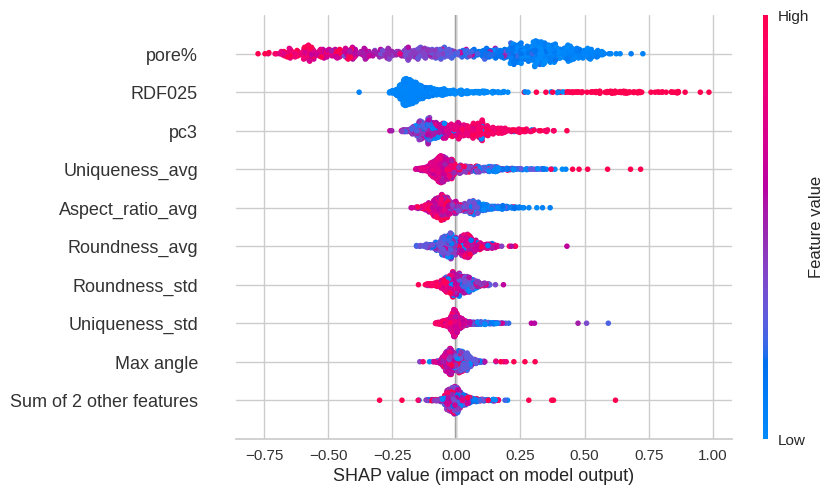

In [ ]:
# REFERENCE summarize the effects of all the features
shap.plots.beeswarm(shap_values)

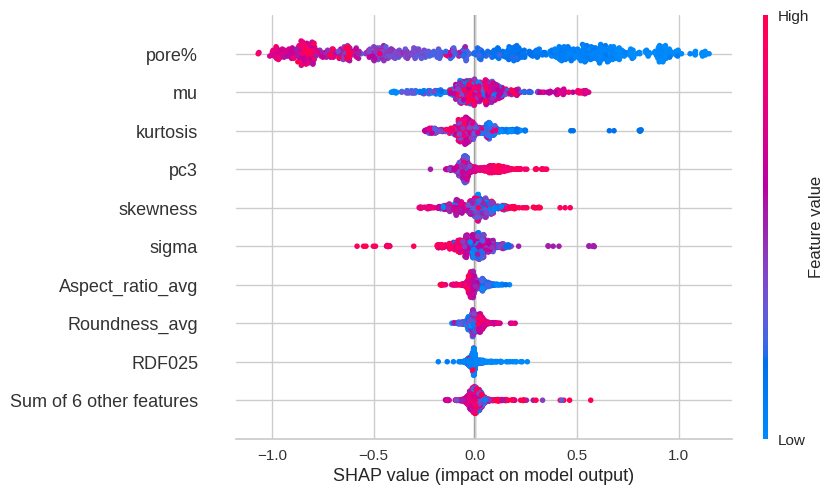

In [ ]:
# PYRO summarize the effects of all the features
shap.plots.beeswarm(shap_values)

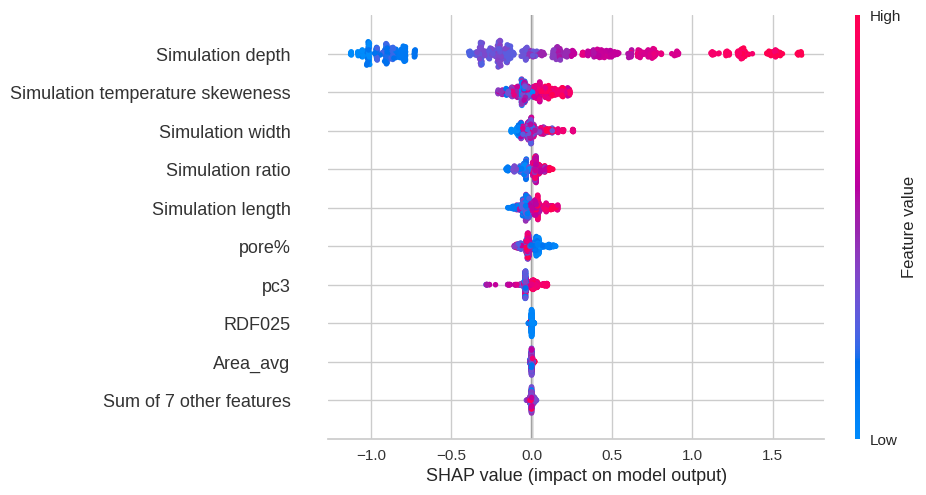

In [ ]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

In [ ]:
# # print the JS visualization code to the notebook
# shap.initjs()

# print(f'Current label Shown: {list_of_labels[current_label.value]}')

# shap.force_plot(base_value = explainer.expected_value[current_label.value],
#                 shap_values = shap_value_single[current_label.value],
#                 features = X.iloc[X_idx:X_idx+1,:],plot_cmap=["#FF5733","#335BFF"]
#                 )

In [ ]:
# Note: We are limiting to the first 50 training examples since it takes time to calculate the full number of sampels

shap_values = explainer.shap_values(X = X.iloc[0:50,:], nsamples = 100)

In [ ]:
# #define colors of markers

# import matplotlib.colors

# norm=plt.Normalize(-2,2)
# cmap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#335BFF","#FF5733"])

In [ ]:
# # print the JS visualization code to the notebook
# shap.initjs()

# print(f'Current Label Shown: {list_of_labels[current_label.value]}\n')

# shap.summary_plot(shap_values = shap_values[current_label.value],
#                   features = X.iloc[0:50,:], show=False
#                   )

# # Change the colormap
# for fc in plt.gcf().get_children():
#     for fcc in fc.get_children():
#         if hasattr(fcc, "set_cmap"):
#             fcc.set_cmap(cmap2)

# #plt.savefig("beeswarm_PC1.png",transparent=True)